In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
#Load data and review content

iris_data=pd.read_csv("C:\\Users\\anu05\\Downloads\\iris.csv")
print(iris_data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [12]:
#use label encoder to convert string to numeric values for the target variable

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
iris_data['Species']=label_encoder.fit_transform(iris_data['Species'])



In [13]:
print(iris_data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


In [14]:
#converting input to numpy array
np_iris=iris_data.to_numpy()
print(np_iris.shape)

(150, 5)


In [15]:
#Seperate feature and target variables
X_data=np_iris[:,0:4]
y_data=np_iris[:,4]

print("\n Features before scaling:  \n--------")
print(X_data[:5,:])
print("\n Features after scaling: \n-------")
print(y_data[:5])


 Features before scaling:  
--------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

 Features after scaling: 
-------
[0. 0. 0. 0. 0.]


In [16]:
#create std scaler model that is fit on the dataset

scaler=StandardScaler().fit(X_data)

#scale the numeric feature variable
X_data=scaler.transform(X_data)

#convert target variable as a one-hot encoding array
y_data=tf.keras.utils.to_categorical(y_data,3)
print("\n Features before scaling:  \n--------")
print(X_data[:5,:])
print("\n Features after scaling: \n-------")
print(y_data[:5])


 Features before scaling:  
--------
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]

 Features after scaling: 
-------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [17]:
#split into train and test

X_train, X_test, y_train, y_test= train_test_split(X_data, y_data, test_size=0.1)

print("\n Train test dimensions:\n------------")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


 Train test dimensions:
------------
(135, 4) (15, 4) (135, 3) (15, 3)


In [18]:
from tensorflow import keras

# Number of classes in the target variable
NB_CLASSES=3

# create a sequential model in keras
model=tf.keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(128, # Number of nodes
                             input_shape=(4,), # number of input variables
                             name="Hidden-Layer-1", #logical name
                             activation='relu')) # activation function

# Add a second hidden layer
model.add(keras.layers.Dense(128,
                            name="Hidden-Layer-2",
                            activation="relu"))

# Add an output layer with softmax function
model.add(keras.layers.Dense(NB_CLASSES,
                            name="Output-Layer",
                            activation="softmax"))

# compile the model with loss and metrics
model.compile(loss='categorical_crossentropy',
             metrics=["accuracy"])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Training and evaluating the model
# Make it verbose so we can see it
VERBOSE=1
# Set the hyperparameters for training , and set bacth size
BATCH_SIZE=16
# Set no. of Epochs
EPOCHS=20
# Set the validation split
VALIDATION_SPLIT=0.2


Epoch 1/20
1/7 [===>..........................] - ETA: 0s - loss: 0.0233 - accuracy: 1.0000

7/7 [==============================] - 0s 25ms/step - loss: 0.0683 - accuracy: 0.9722 - val_loss: 0.3850 - val_accuracy: 0.8519
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.3734 - val_accuracy: 0.8519
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0536 - accuracy: 0.9815 - val_loss: 0.3891 - val_accuracy: 0.8519
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0504 - accuracy: 0.9815 - val_loss: 0.3496 - val_accuracy: 0.8519
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0473 - accuracy: 0.9815 - val_loss: 0.3584 - val_accuracy: 0.8519
Epoch 6/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0430 - accuracy: 0.9907 - val_loss: 0.3545 - val_accuracy: 0.8519
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - accuracy: 0.9815 - val_loss: 0.3430 - val_accuracy: 0.8519
Epoch 8/20
7/7 [============================

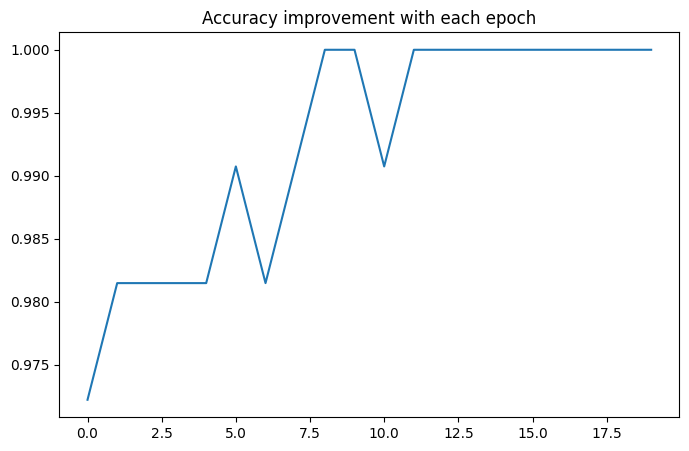

Evaluation against test dataset: 
-------
1/1 [==============================] - 0s 43ms/step - loss: 0.0259 - accuracy: 1.0000


[0.025937575846910477, 1.0]

In [21]:
# Fitting the model performs the entire training cycle, forw prop, loss computn, back prop, grad descent.
# Executed for particlar batch sizes and epochs and performs for each epochs

history=model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

print("Accuracy during training: \n---------")

import matplotlib.pyplot as plt

#plot accuracy of model after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvement with each epoch")
plt.show()


print("Evaluation against test dataset: \n-------")
model.evaluate(X_test, y_test)

In [22]:
#Save the model
model.save("iris_save")

#load the model
loaded_model=keras.models.load_model("iris_save")

#Print the model summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
#Predictions with the Deep Learing Model

#Raw prediction input
prediction_input=[[8.6,9.,2.4,6.4]]

#scale the features with the same scaling model
scaled_input=scaler.transform(prediction_input)

#get the raw prediction probabilities
raw_prediction=loaded_model.predict(scaled_input)
print("Raw Prediciton Output (Probabilities):", raw_prediction)
#Find predicition 
prediction=np.argmax(raw_prediction)
print("Prediction is:",label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 43ms/step
Raw Prediciton Output (Probabilities): [[1.352649e-04 9.998647e-01 5.689595e-13]]
Prediction is: ['Iris-versicolor']
